In [211]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

df = pd.read_excel("dataset.xlsx")
df.to_csv('dataset.csv',index = False)



In [212]:
# Exploratory Data Analysis.
df = pd.read_csv('dataset.csv')
print(df.head())
print(df.shape)
print(df.describe())

   Transaction date  House Age  Distance from nearest Metro station (km)  \
0       2012.916667       32.0                                  84.87882   
1       2012.916667       19.5                                 306.59470   
2       2013.583333       13.3                                 561.98450   
3       2013.500000       13.3                                 561.98450   
4       2012.833333        5.0                                 390.56840   

   Number of convenience stores  latitude  longitude  Number of bedrooms  \
0                            10  24.98298  121.54024                   1   
1                             9  24.98034  121.53951                   2   
2                             5  24.98746  121.54391                   3   
3                             5  24.98746  121.54391                   2   
4                             5  24.97937  121.54245                   1   

   House size (sqft)  House price of unit area  
0                575                 

In [213]:
# Checking Missing Values
print("Missing Values per Column:")
print(df.isnull().sum())

# Information of Dataset
(df.info())

Missing Values per Column:
Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude   

     Transaction date  House Age  Distance from nearest Metro station (km)  \
0         2012.916667       32.0                                  84.87882   
1         2012.916667       19.5                                 306.59470   
2         2013.583333       13.3                                 561.98450   
3         2013.500000       13.3                                 561.98450   
4         2012.833333        5.0                                 390.56840   
..                ...        ...                                       ...   
409       2013.000000       13.7                                4082.01500   
410       2012.666667        5.6                                  90.45606   
411       2013.250000       18.8                                 390.96960   
412       2013.000000        8.1                                 104.81010   
413       2013.500000        6.5                                  90.45606   

     Number of convenience stores  latitude  longitude  Number 

In [215]:
# Combining Distance and Latitude
df['Distance * Latitude'] = df['Distance from nearest Metro station (km)'] * df['latitude']
df['Distance * Longitude'] = df['Distance from nearest Metro station (km)'] * df['longitude']
print(df.columns)

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area',
       'Year', 'Fractional Year', 'Days', 'Transaction date (formatted)',
       'Distance * Latitude', 'Distance * Longitude'],
      dtype='object')


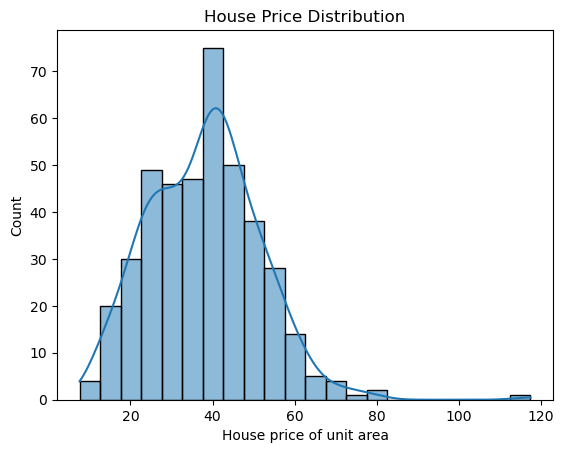

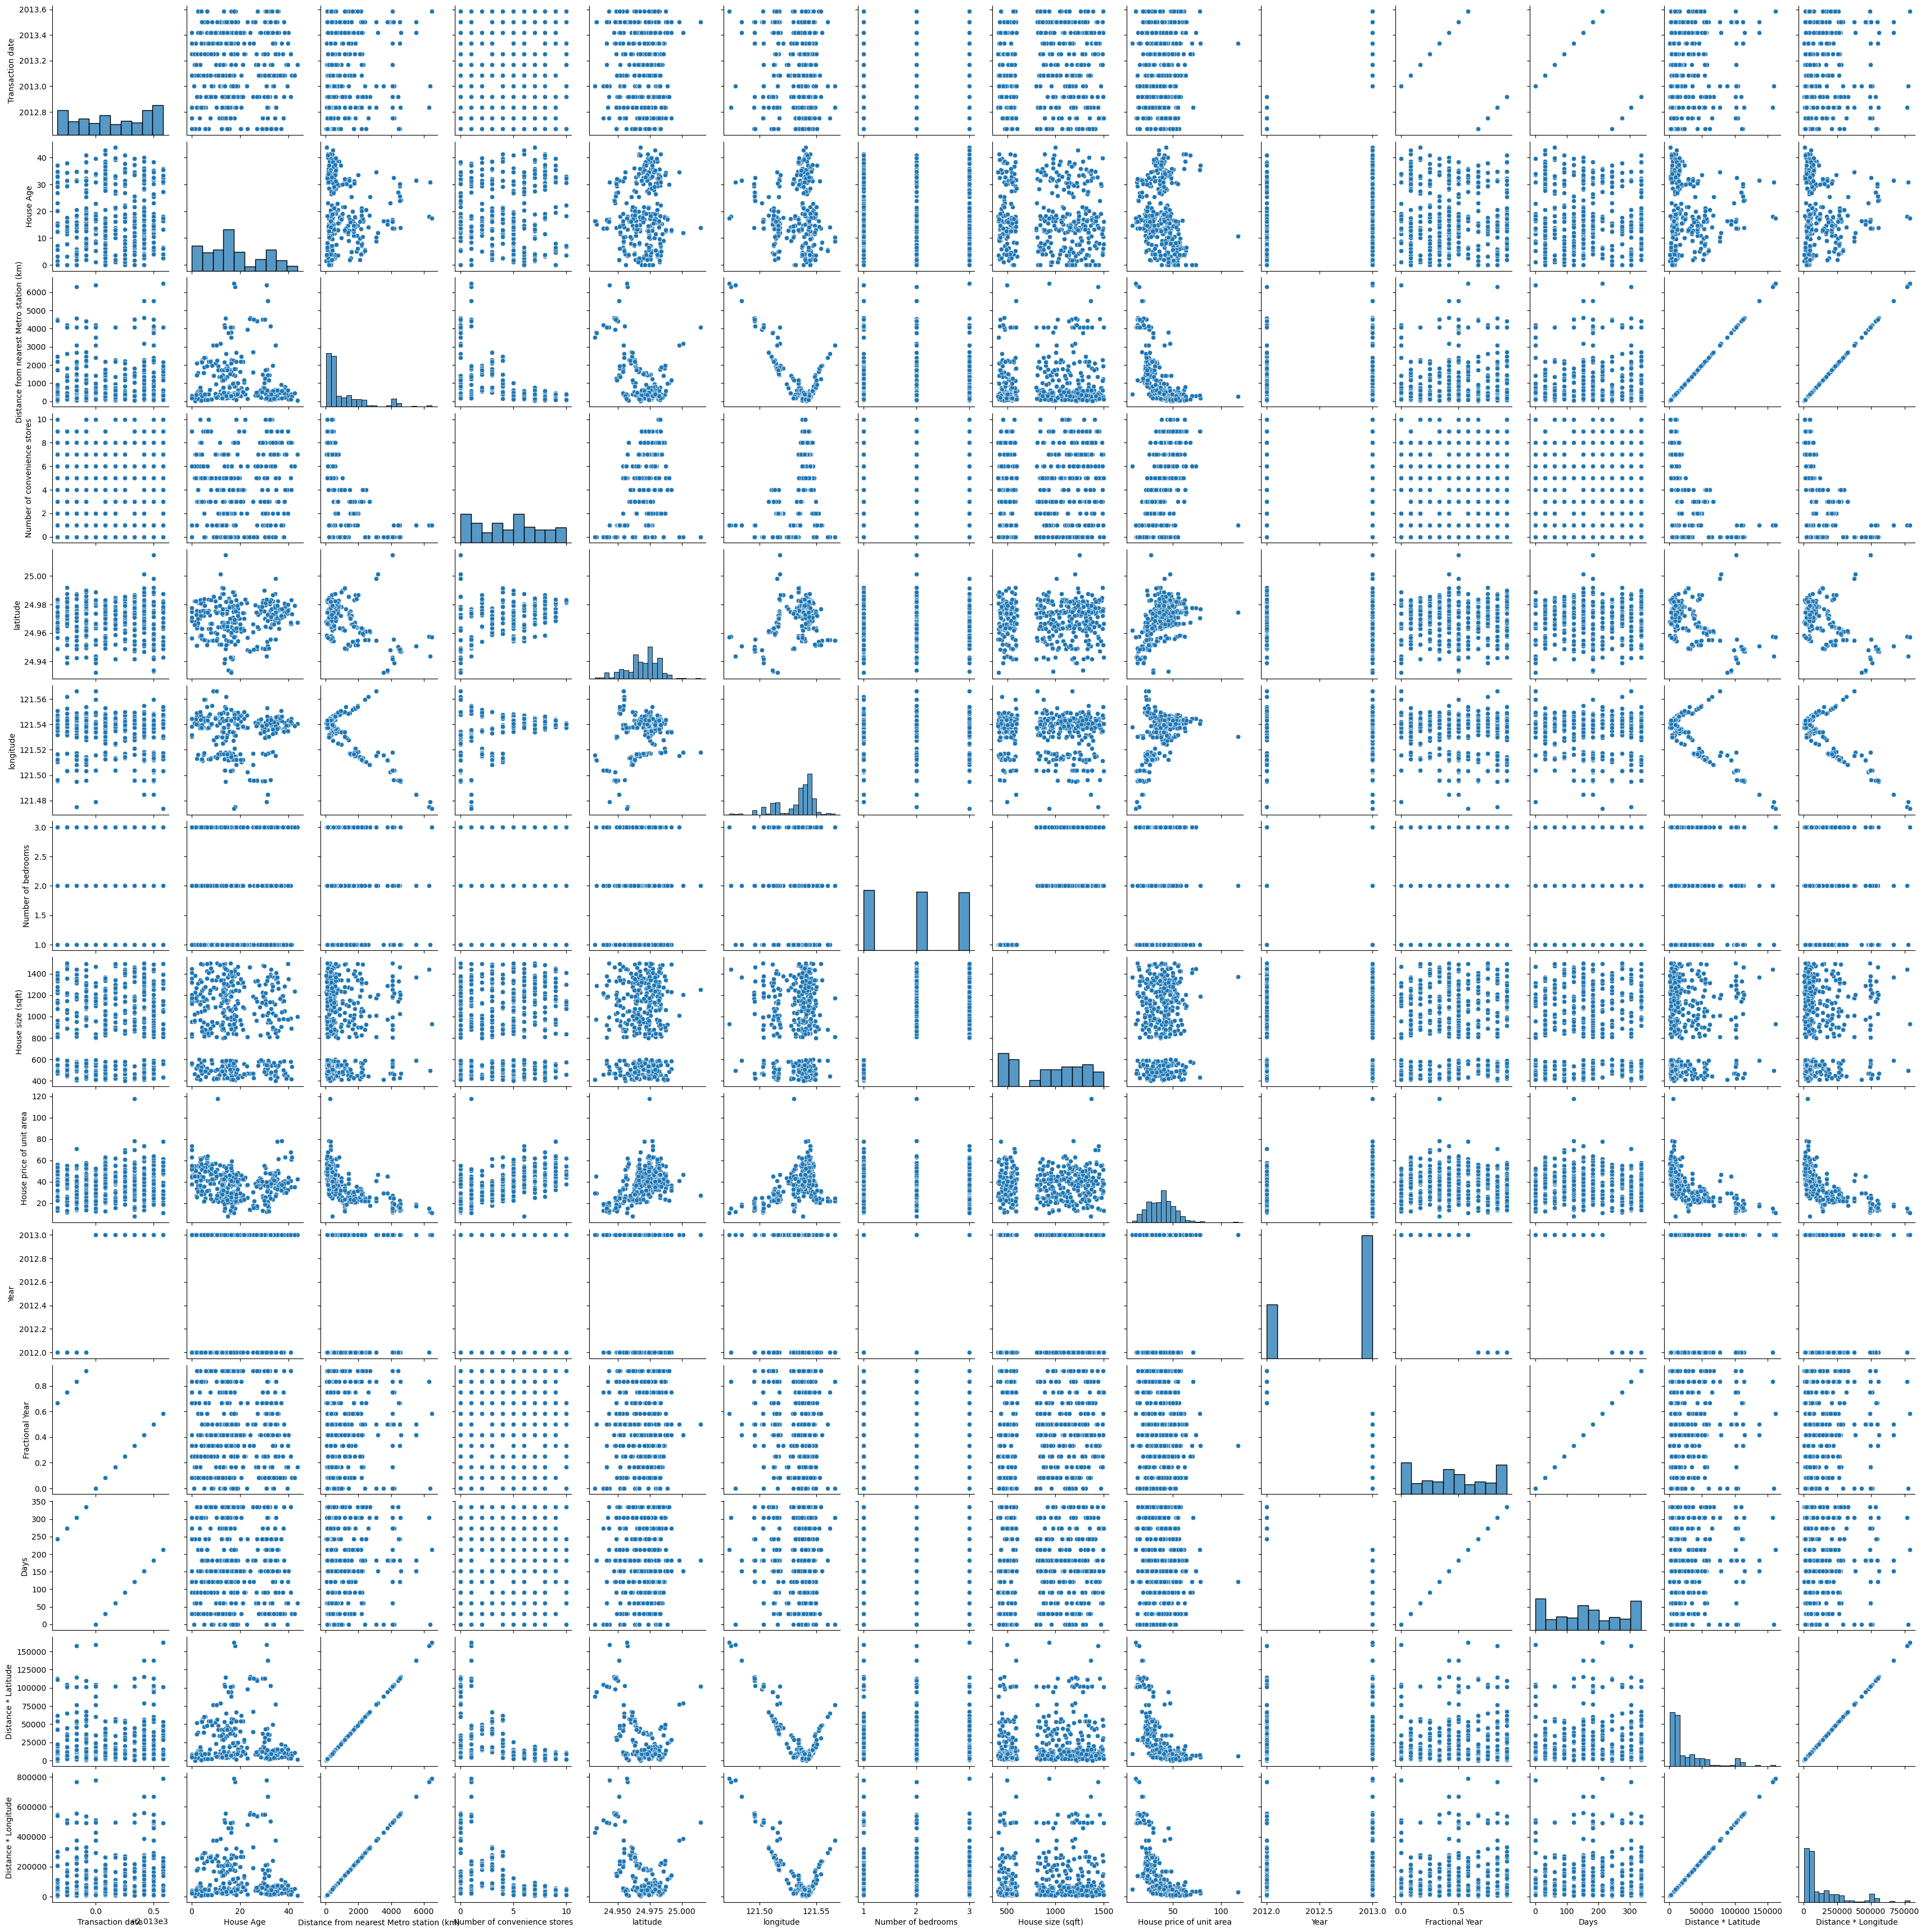

In [216]:
#Target Variable Inspection
sns.histplot(df['House price of unit area'], kde=True)
plt.title("House Price Distribution")
plt.show()

# Relationship between target variable and Other Columns
sns.pairplot(df)
plt.show()



In [217]:
# Controlling Unique Values for Categorical Variables
for col in df.columns:
    unique_values = df[col].nunique()
    print(f"{col}: {unique_values} unique values")


Transaction date: 12 unique values
House Age: 236 unique values
Distance from nearest Metro station (km): 259 unique values
Number of convenience stores: 11 unique values
latitude: 234 unique values
longitude: 232 unique values
Number of bedrooms: 3 unique values
House size (sqft): 328 unique values
House price of unit area: 270 unique values
Year: 2 unique values
Fractional Year: 12 unique values
Days: 12 unique values
Transaction date (formatted): 12 unique values
Distance * Latitude: 259 unique values
Distance * Longitude: 259 unique values


In [218]:
# Standardization for continuous features
scaler = StandardScaler()
features =['House Age', 'Distance from nearest Metro station (km)', 
                       'Number of convenience stores','Number of bedrooms','House size (sqft)', 'House price of unit area']

df[features] = scaler.fit_transform(df[features])
print(df.head())


   Transaction date  House Age  Distance from nearest Metro station (km)  \
0       2012.916667   1.255628                                 -0.792495   
1       2012.916667   0.157086                                 -0.616612   
2       2013.583333  -0.387791                                 -0.414015   
3       2013.500000  -0.387791                                 -0.414015   
4       2012.833333  -1.117223                                 -0.549997   

   Number of convenience stores  latitude  longitude  Number of bedrooms  \
0                      2.007407  24.98298  121.54024           -1.207899   
1                      1.667503  24.98034  121.53951            0.014766   
2                      0.307885  24.98746  121.54391            1.237432   
3                      0.307885  24.98746  121.54391            0.014766   
4                      0.307885  24.97937  121.54245           -1.207899   

   House size (sqft)  House price of unit area  Year  Fractional Year  Days  \
0      

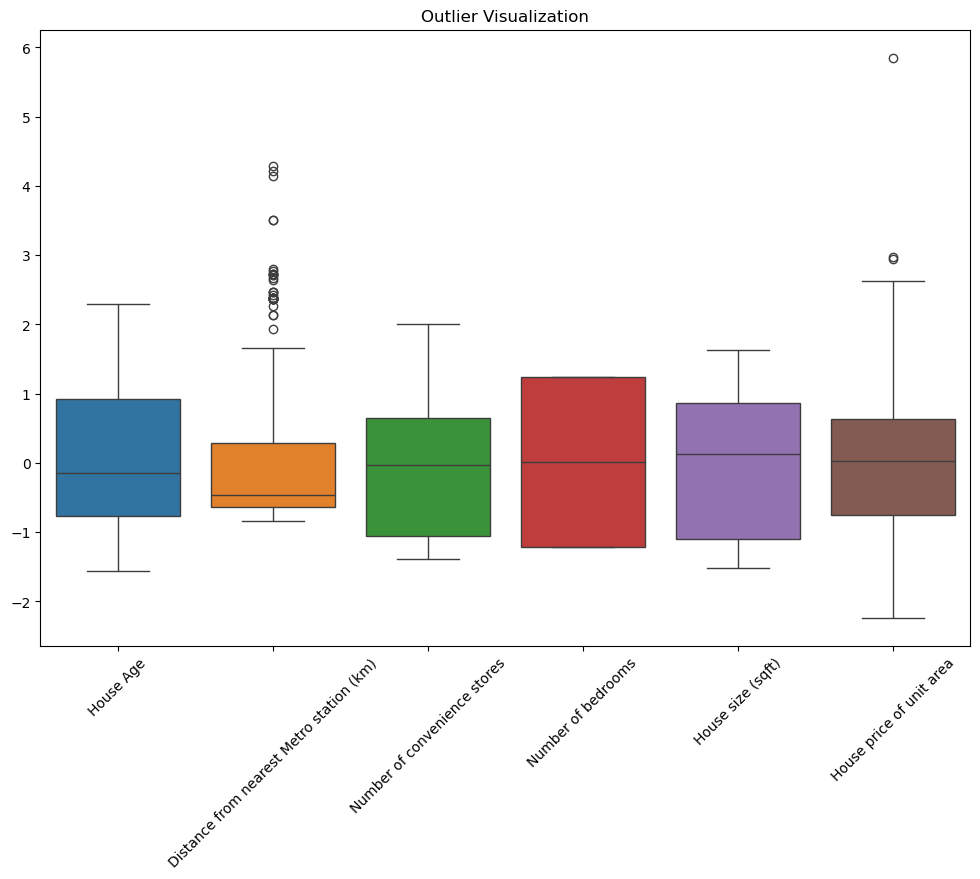

Number of Outliers:
House Age: 0 outliers
Distance from nearest Metro station (km): 5 outliers
Number of convenience stores: 0 outliers
Number of bedrooms: 0 outliers
House size (sqft): 0 outliers
House price of unit area: 1 outliers
Data Size After Removing Outlier Data : (408, 15)


In [219]:
# Outlier Detection Boxplot
numerical_columns =['House Age', 'Distance from nearest Metro station (km)', 
                       'Number of convenience stores','Number of bedrooms','House size (sqft)', 'House price of unit area']
# Outlier Visualization
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_columns])
plt.title("Outlier Visualization")
plt.xticks(rotation=45)
plt.show()

# Outlier detection using Z-Score method
z_scores = df[numerical_columns].apply(zscore)
outliers = (z_scores.abs() > 3)  

# Checking number of outliers 
print("Number of Outliers:")
for col in numerical_columns:
    print(f"{col}: {outliers[col].sum()} outliers")
    
#  Filtering The Outliers
df_cleaned = df[(z_scores.abs() <= 3).all(axis=1)]
print(f"Data Size After Removing Outlier Data : {df_cleaned.shape}")


In [220]:
#Clipping Outliers
#For Distance from the nearest Metro station (km)
upper_limit_distance = df['Distance from nearest Metro station (km)'].quantile(0.99)
df['Distance from nearest Metro station (km)'] = np.clip(
    df['Distance from nearest Metro station (km)'], None, upper_limit_distance
)

#For House price of unit area 
upper_limit_price = df['House price of unit area'].quantile(0.99)
df['House price of unit area'] = np.clip(
    df['House price of unit area'], None, upper_limit_price
)

print(df[['Distance from nearest Metro station (km)', 'House price of unit area']].head())


   Distance from nearest Metro station (km)  House price of unit area
0                                 -0.792495                 -0.005901
1                                 -0.616612                  0.310507
2                                 -0.414015                  0.685782
3                                 -0.414015                  1.237656
4                                 -0.549997                  0.376732


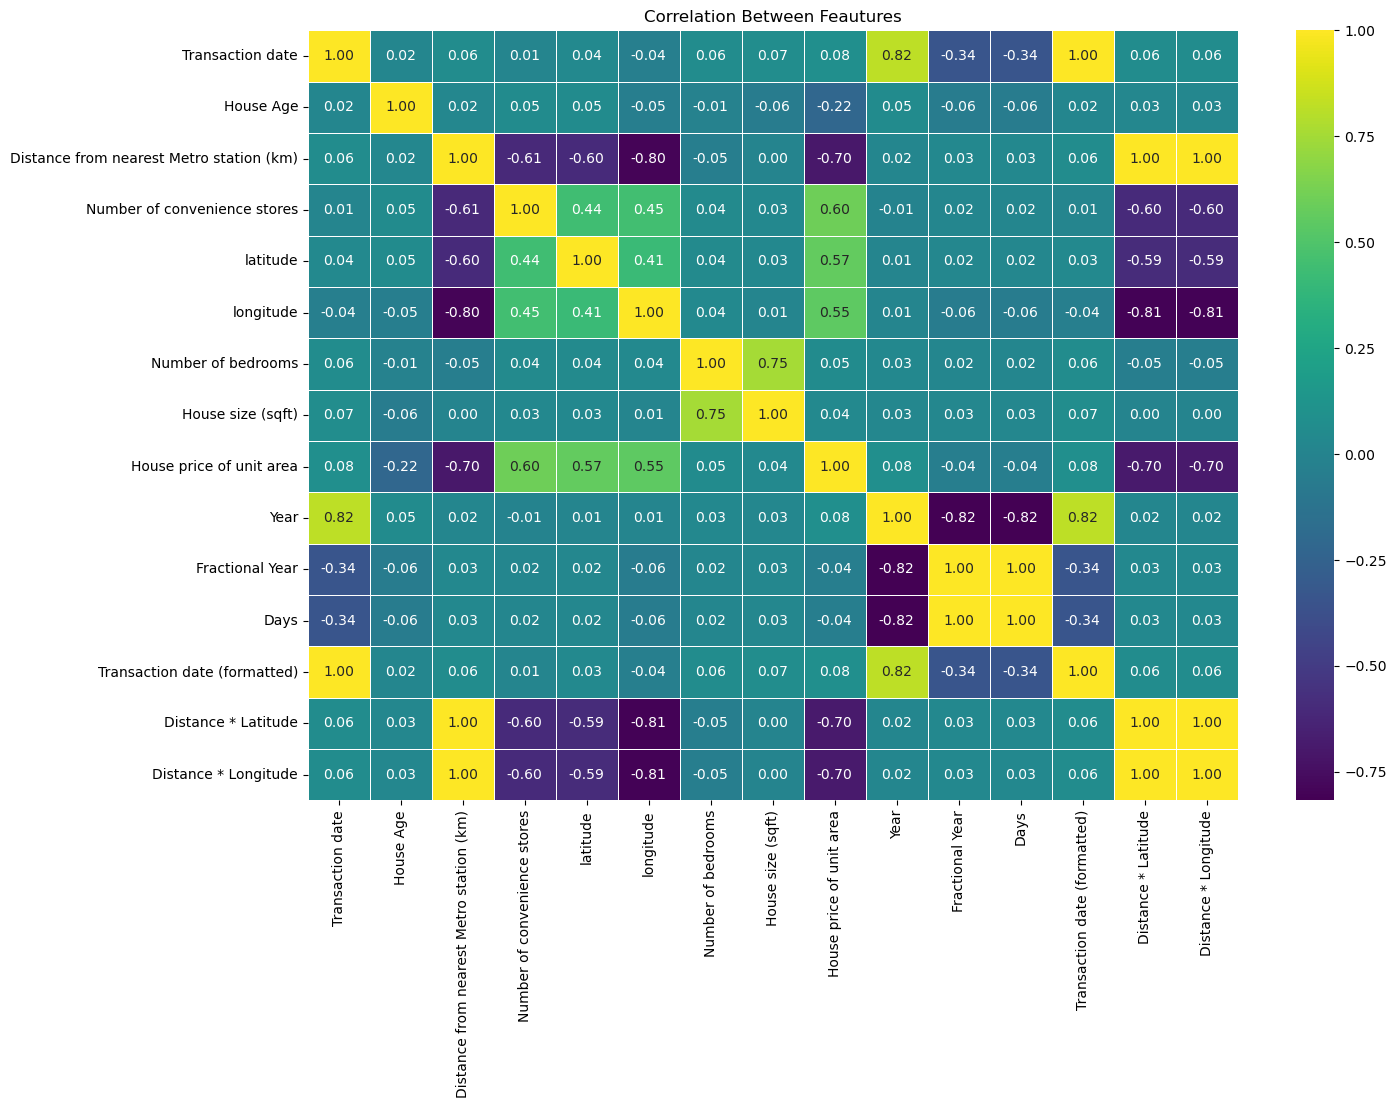

In [221]:
# Data Visualization
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))  

# Visualiasiton with heatmap
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Feautures')
plt.show()

In [222]:
# Correlation with the target variable ('House price of unit area')
target_corr = corr_matrix['House price of unit area'].sort_values(ascending=False)
print(target_corr)

House price of unit area                    1.000000
Number of convenience stores                0.601236
latitude                                    0.565830
longitude                                   0.546868
Transaction date                            0.082441
Transaction date (formatted)                0.082326
Year                                        0.077436
Number of bedrooms                          0.053401
House size (sqft)                           0.037784
Fractional Year                            -0.044097
Days                                       -0.044260
House Age                                  -0.218476
Distance * Latitude                        -0.696419
Distance * Longitude                       -0.696456
Distance from nearest Metro station (km)   -0.701333
Name: House price of unit area, dtype: float64


In [223]:
#House price of unit area' with selecting low corelation
low_corr_features = corr_matrix['House price of unit area'][abs(corr_matrix['House price of unit area']) < 0.05].index
print("Low Correlation Features:", low_corr_features.tolist())

Low Correlation Features: ['House size (sqft)', 'Fractional Year', 'Days']


In [224]:
# removes the features that have low correlation with the target variable from the dataframe.
X_reduced = df.drop(columns=low_corr_features)

#Split the data and build model with the remaining features
X = X_reduced.drop(columns=['House price of unit area'])  
y = df['House price of unit area']  # Target Variable

In [225]:
# Feature Selection
corr_matrix = df.corr()
# Selecting features that have a very high negative or positive correlation with the target variable
target_corr = corr_matrix['House price of unit area'].sort_values(ascending=False)
print("Higher Correlated Data With Target Variable :")
print(target_corr)

Higher Correlated Data With Target Variable :
House price of unit area                    1.000000
Number of convenience stores                0.601236
latitude                                    0.565830
longitude                                   0.546868
Transaction date                            0.082441
Transaction date (formatted)                0.082326
Year                                        0.077436
Number of bedrooms                          0.053401
House size (sqft)                           0.037784
Fractional Year                            -0.044097
Days                                       -0.044260
House Age                                  -0.218476
Distance * Latitude                        -0.696419
Distance * Longitude                       -0.696456
Distance from nearest Metro station (km)   -0.701333
Name: House price of unit area, dtype: float64


In [226]:
# Train test Split
X = X.drop('Transaction date', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data size: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test data size: X_test: {X_test.shape}, y_test: {y_test.shape}")

Training data size: X_train: (331, 10), y_train: (331,)
Test data size: X_test: (83, 10), y_test: (83,)


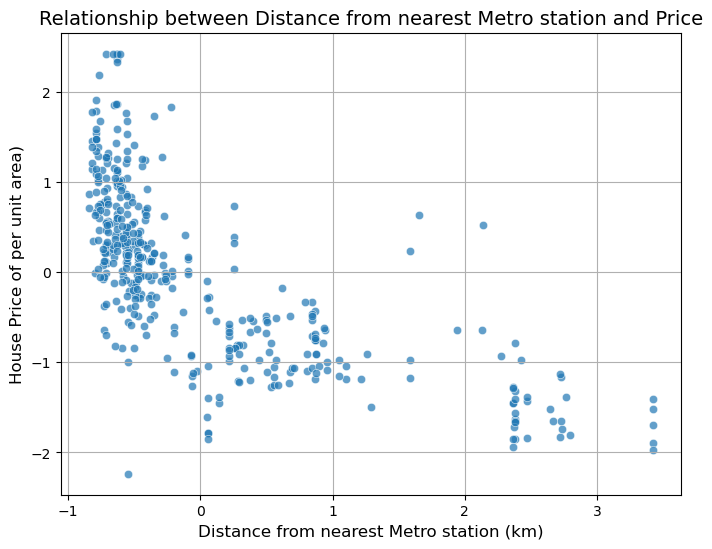

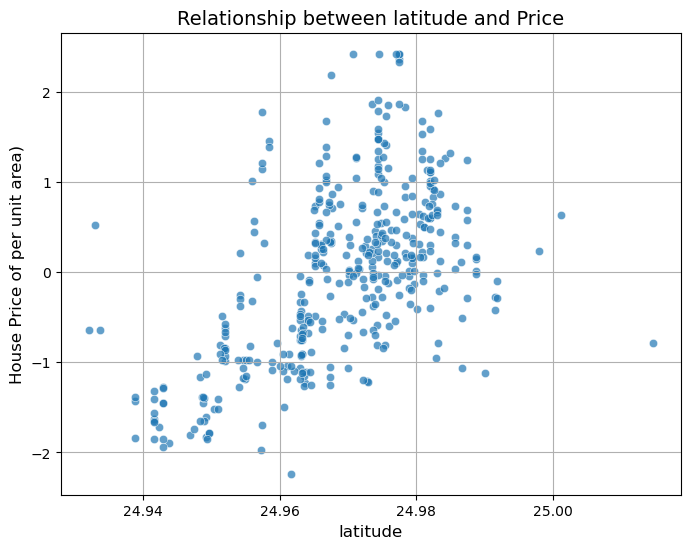

In [227]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Distance from nearest Metro station (km)', y='House price of unit area', alpha=0.7)


plt.title('Relationship between Distance from nearest Metro station and Price', fontsize=14)
plt.xlabel('Distance from nearest Metro station (km)', fontsize=12)
plt.ylabel('House Price of per unit area)', fontsize=12)
plt.grid(True)
plt.show()



plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='latitude', y='House price of unit area', alpha=0.7)


plt.title('Relationship between latitude and Price', fontsize=14)
plt.xlabel('latitude', fontsize=12)
plt.ylabel('House Price of per unit area)', fontsize=12)
plt.grid(True)
plt.show()

In [232]:
# Models 
# Linear Regression

model = LinearRegression()
#X_train = X_train.drop(['Year','Transaction date (formatted)'], axis = 1)
#X_test = X_test.drop(['Year','Transaction date (formatted)'], axis = 1)

print(X_train.info())
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

# Performance Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)


X_test = Index(['House Age', 'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'Year', 'Transaction date (formatted)',
       'Distance * Latitude', 'Distance * Longitude'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 331 entries, 192 to 102
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   House Age                                 331 non-null    float64
 1   Distance from nearest Metro station (km)  331 non-null    float64
 2   Number of convenience stores              331 non-null    float64
 3   latitude                                  331 non-null    float64
 4   longitude                                 331 non-null    float64
 5   Number of bedrooms                        331 non-null    float64
 6   Distance * Latitude                       3

In [ ]:
# Random Forest Regessor, XGBRegressor, SVR

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Support Vector Regressor
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)

# Performance Metrics

print("Random Forest MAE:", mean_absolute_error(y_test, rf_pred))
print("Random Forest MSE:", mean_squared_error(y_test, rf_pred))
print("Random Forest R2:", r2_score(y_test, rf_pred))

print("XGBoost MAE:", mean_absolute_error(y_test, xgb_pred))
print("XGBoost MSE:", mean_squared_error(y_test, xgb_pred))
print("XGBoost R2:", r2_score(y_test, xgb_pred))

print("SVR MAE:", mean_absolute_error(y_test, svr_pred))
print("SVR MSE:", mean_squared_error(y_test, svr_pred))
print("SVR R2:", r2_score(y_test, svr_pred))

# GridSearch for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3)
grid_search_rf.fit(X_train, y_train)
print("Random Forest Best Parameters:", grid_search_rf.best_params_)

# GridSearch for Xgboost
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'n_estimators': [100, 200, 300]
}
grid_search_xgb = GridSearchCV(XGBRegressor(), param_grid_xgb, cv=3)
grid_search_xgb.fit(X_train, y_train)
print("XGBoost Best Parameters:", grid_search_xgb.best_params_)

#Re-training with the best models
best_rf_model = grid_search_rf.best_estimator_
best_xgb_model = grid_search_xgb.best_estimator_

#Re-prediction
rf_pred_optimized = best_rf_model.predict(X_test)
xgb_pred_optimized = best_xgb_model.predict(X_test)

# "Performance Evaluation"
print("Optimized Random Forest MAE:", mean_absolute_error(y_test, rf_pred_optimized))
print("Optimized Random Forest MSE:", mean_squared_error(y_test, rf_pred_optimized))
print("Optimized Random Forest R2:", r2_score(y_test, rf_pred_optimized))

print("Optimized XGBoost MAE:", mean_absolute_error(y_test, xgb_pred_optimized))
print("Optimized XGBoost MSE:", mean_squared_error(y_test, xgb_pred_optimized))
print("Optimized XGBoost R2:", r2_score(y_test, xgb_pred_optimized))



# Random Forest Cross-Validation
cv_scores_rf = cross_val_score(best_rf_model, X, y, cv=5)
print(f"Random Forest Cross-Validation R2: {cv_scores_rf.mean()}")

# XGBoost Cross-Validation
cv_scores_xgb = cross_val_score(best_xgb_model, X, y, cv=5)
print(f"XGBoost Cross-Validation R2: {cv_scores_xgb.mean()}")


Random Forest MAE: 0.3094835025720192
Random Forest MSE: 0.18183436962456795
Random Forest R2: 0.7998157079856614
XGBoost MAE: 0.3584152284474719
XGBoost MSE: 0.26275930128394986
XGBoost R2: 0.7107241892370887
SVR MAE: 0.3040305541697874
SVR MSE: 0.2040431515545004
SVR R2: 0.775365713761117
Random Forest Best Parameters: {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 200}
XGBoost Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.7}
Optimized Random Forest MAE: 0.2979371228065875
Optimized Random Forest MSE: 0.17167865627843643
Optimized Random Forest R2: 0.8109962911190561
Optimized XGBoost MAE: 0.2981795465374704
Optimized XGBoost MSE: 0.17517915970191217
Optimized XGBoost R2: 0.8071425323331397
Random Forest Cross-Validation R2: 0.7409426641826724
XGBoost Cross-Validation R2: 0.7510468296525805


In [ ]:
lasso = Lasso(alpha=0.1)  

lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

# Performance Metrics
print("Lasso Regression Performance:")
print(f"  R2 Score: {r2_score(y_test, y_pred):.4f}")
print(f"  Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"  Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")


NameError: name 'X_train_scaled' is not defined